In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dredFISH.Utils.__init__plots import *

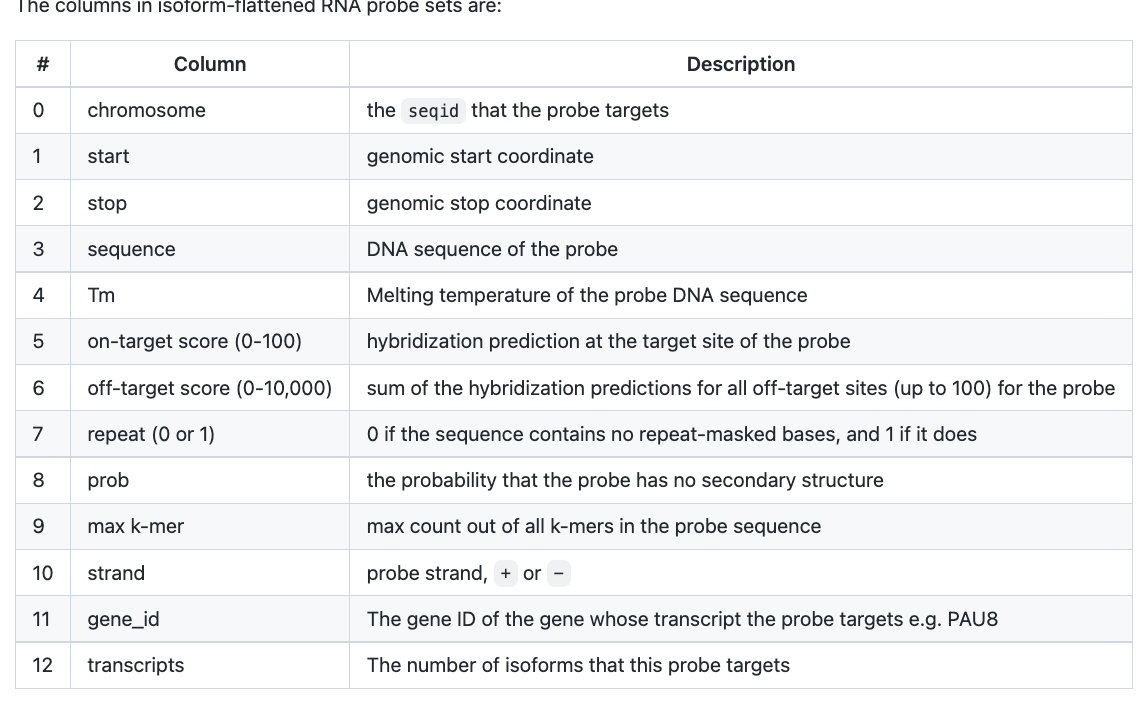

In [2]:
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)
    

In [3]:
# ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test6_full_new/" 
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test5_chr1_new/" 
f = os.path.join(ddir, "pipeline_output/03_output_files/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]


df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214512,3214541,AAAGCACCATGACCAAGGACACCGAAAACA,41.02,35.893,0.0,0,0.455,2,+,Xkr4,1,30,0.466667
1,chr1,3214544,3214573,AAGCGGGAATGTTTACTTGCTGTGTGGAGG,41.07,49.515,0.0,0,0.346,0,+,Xkr4,1,30,0.500000
2,chr1,3214632,3214661,TTAGCTGATGGAGTGGTAAGCCCTCAAGCA,41.14,22.104,0.0,0,0.301,0,+,Xkr4,1,30,0.500000
3,chr1,3214765,3214794,GGGAAGAGGGTAAGTCTGTACACAGCAGGG,41.25,39.100,0.0,0,0.332,0,+,Xkr4,1,30,0.566667
4,chr1,3214881,3214910,AATTTGGCACTCGAAAGATGTGGCACGTGG,41.75,39.826,0.0,0,0.197,0,+,Xkr4,1,30,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64386,chr1,195163460,195163489,AGCCTTTTCTCCAATGAGGCGGTAGCTAGG,41.54,49.311,0.0,0,0.286,0,+,Cr2,2,30,0.533333
64387,chr1,195176574,195176603,GAGTGAAGAAAACCCAGAGCGAACCCAAGG,41.01,34.110,0.0,0,0.521,0,+,Cr2,2,30,0.533333
64388,chr1,195176604,195176633,ATCCCATGTGTGCAGCAGTCCAATGGCAGG,44.40,67.022,0.0,0,0.321,0,+,Cr2,2,30,0.566667
64389,chr1,195176634,195176663,TTGCGCTCTGTGAGTTGTGAGCCTGTAGCA,43.44,52.252,0.0,0,0.318,0,+,Cr2,2,30,0.533333


In [4]:
# df[df['gname'] == 'Xkr4']
(df['len'] != 30).sum(), (df['repeat'] == 1).sum()

(0, 3813)

In [5]:
cond1 = df['len']==30
cond2 = df['repeat']==0
cond = np.logical_and(cond1, cond2)

df2 = df[cond]
print(df.shape, df2.shape)

cond3 = df2['offscore']<50
df3 =  df2[cond3].copy()
print(df3.shape)

cond4 = df3['onscore']>98
df4 =  df3[cond4].copy()
print(df4.shape)

(64391, 15) (60578, 15)
(59393, 15)
(0, 15)


<AxesSubplot:xlabel='prob', ylabel='Count'>

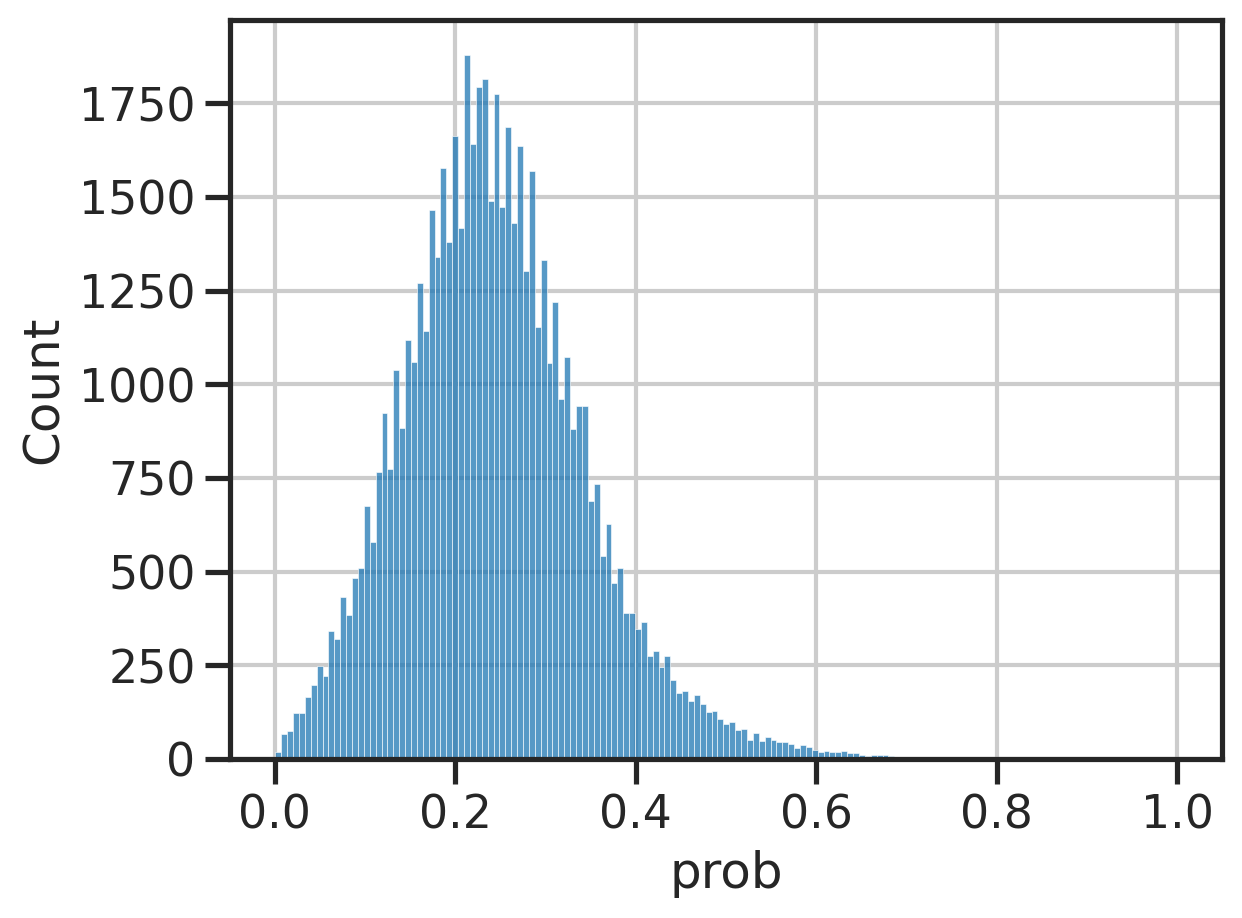

In [6]:
sns.histplot(df2['prob'])

Text(0, 0.5, 'max k-mer')

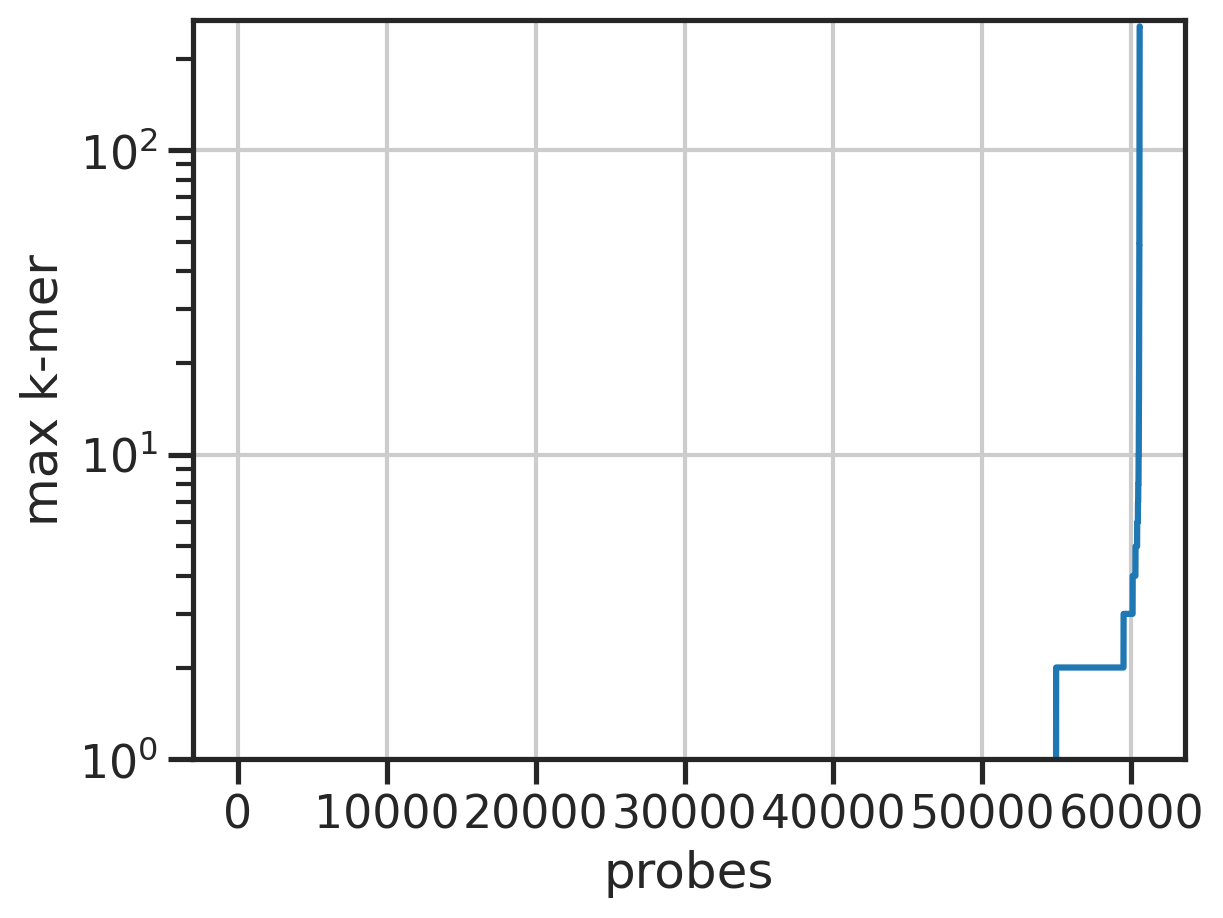

In [7]:
plt.plot(np.sort(df2['maxkmer']))
plt.ylim([1, None])
plt.yscale('log')
plt.xlabel('probes')
plt.ylabel('max k-mer')

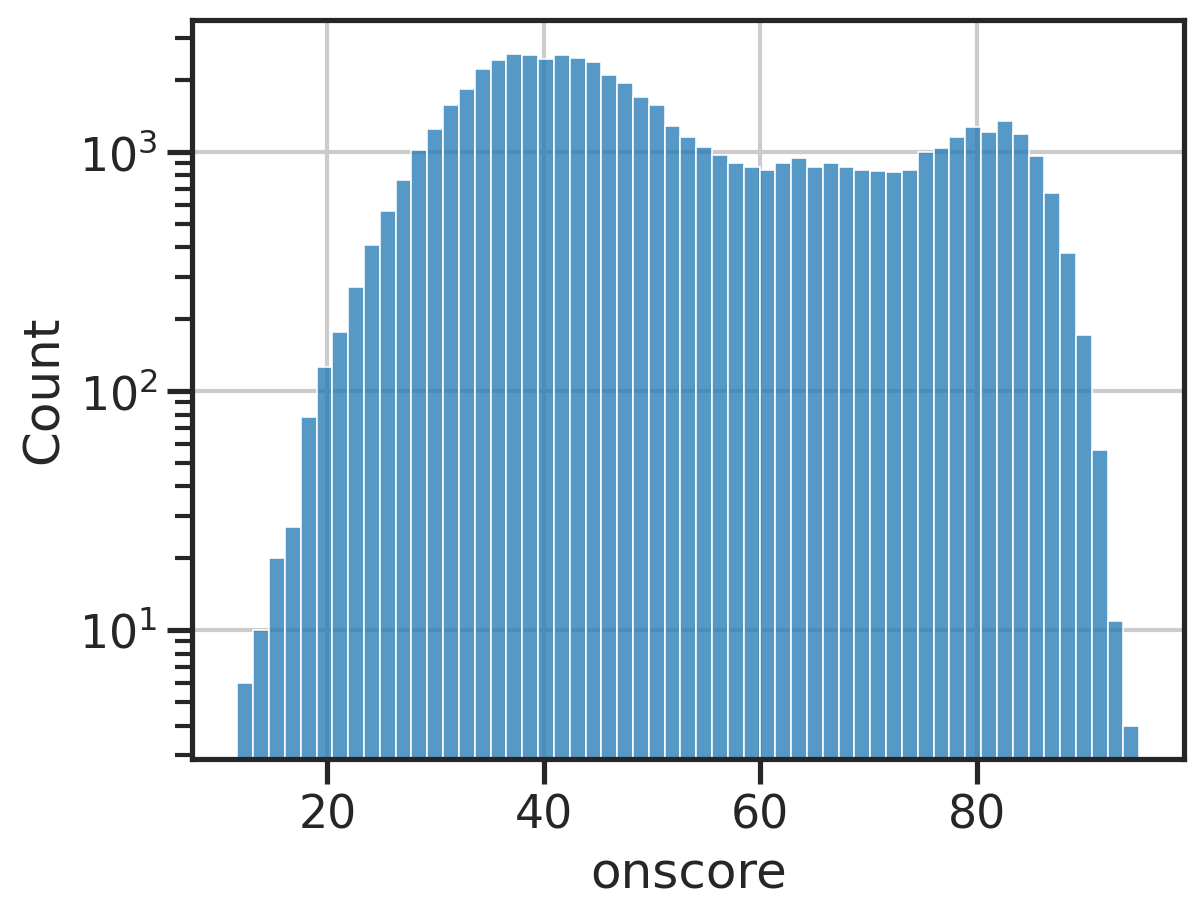

In [8]:
sns.histplot(df2['onscore'])
plt.yscale('log')

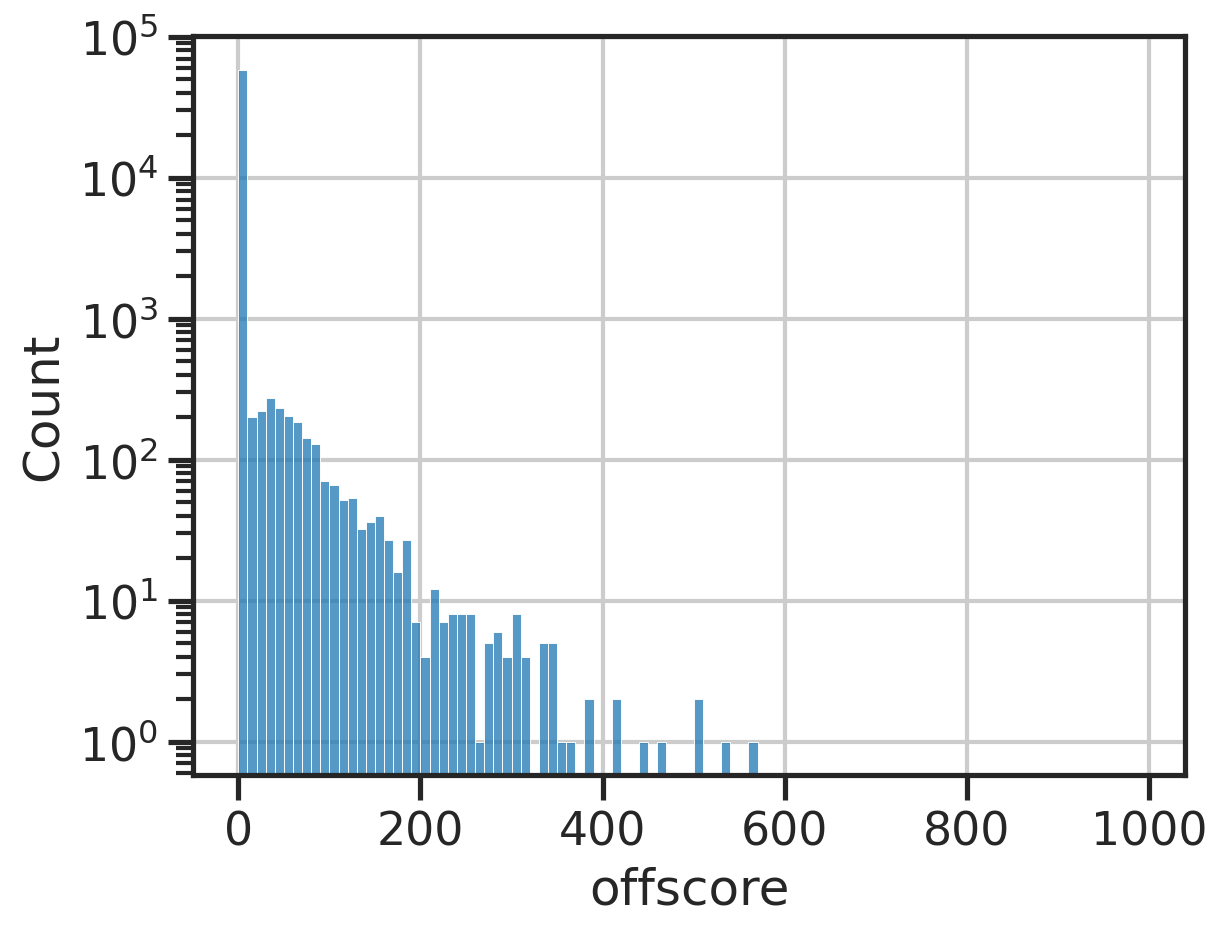

In [9]:
sns.histplot(df2['offscore'], bins=np.arange(0, 1000, 10))
plt.yscale('log')

<AxesSubplot:xlabel='gc', ylabel='tm'>

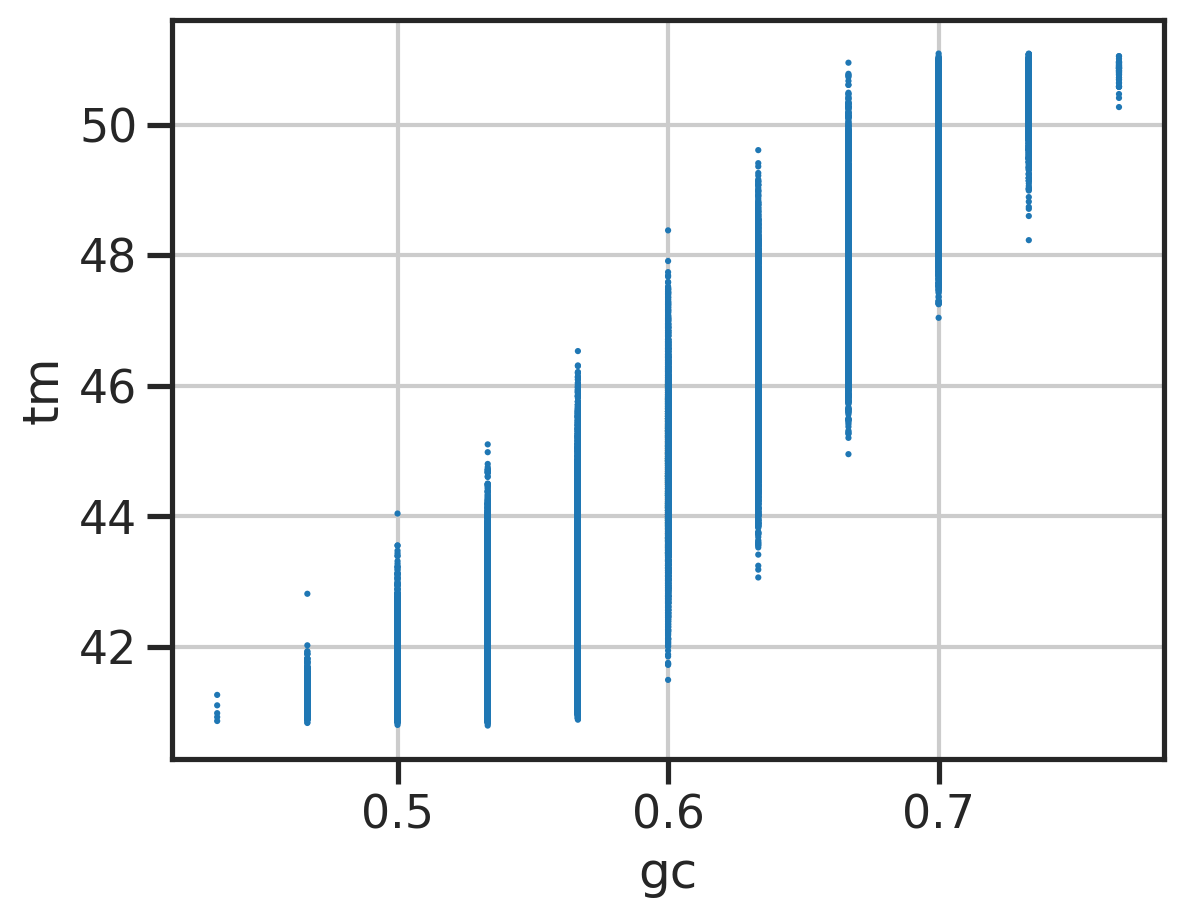

In [10]:
sns.scatterplot(data=df2, x='gc', y='tm', edgecolor='none', s=5) 

<AxesSubplot:xlabel='offscore', ylabel='maxkmer'>

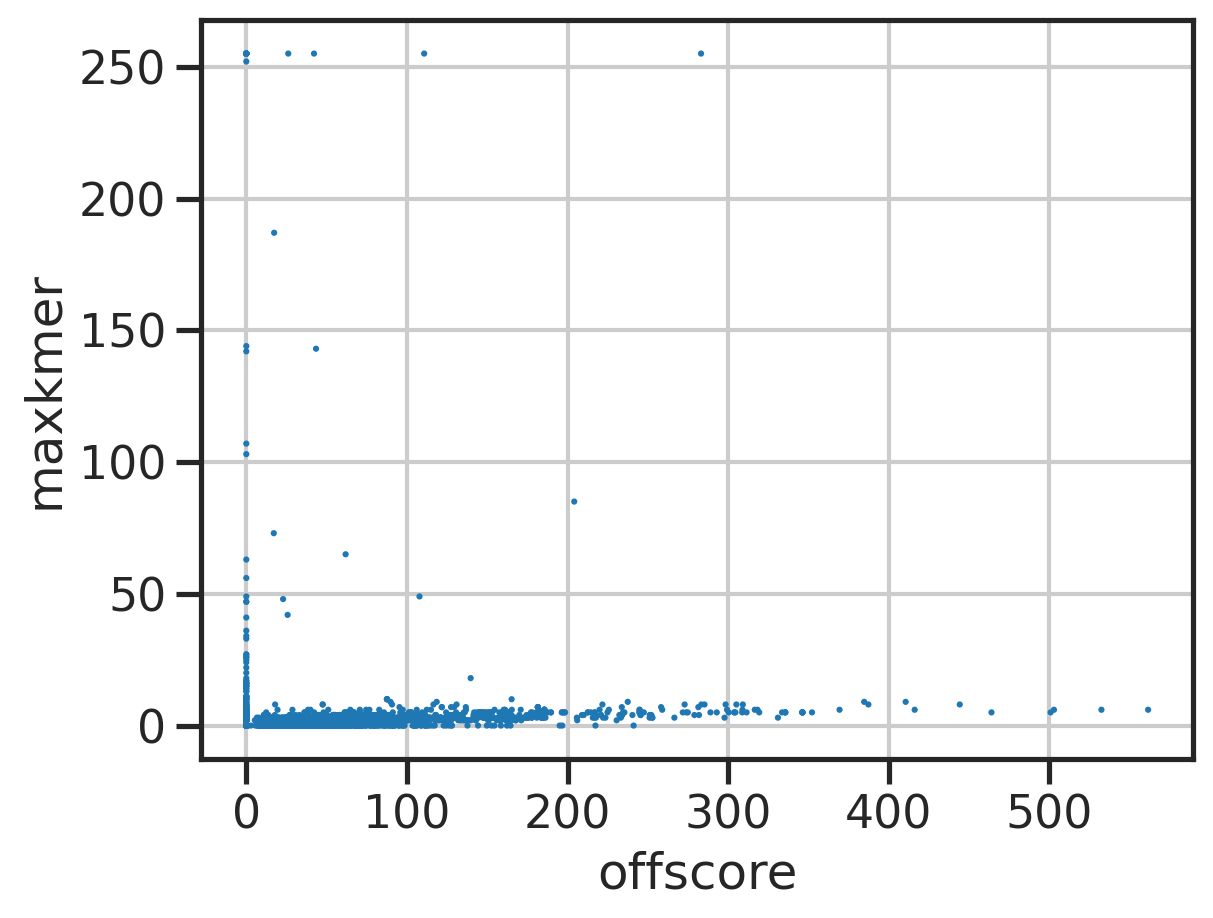

In [11]:
sns.scatterplot(data=df2, x='offscore', y='maxkmer', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='offscore'>

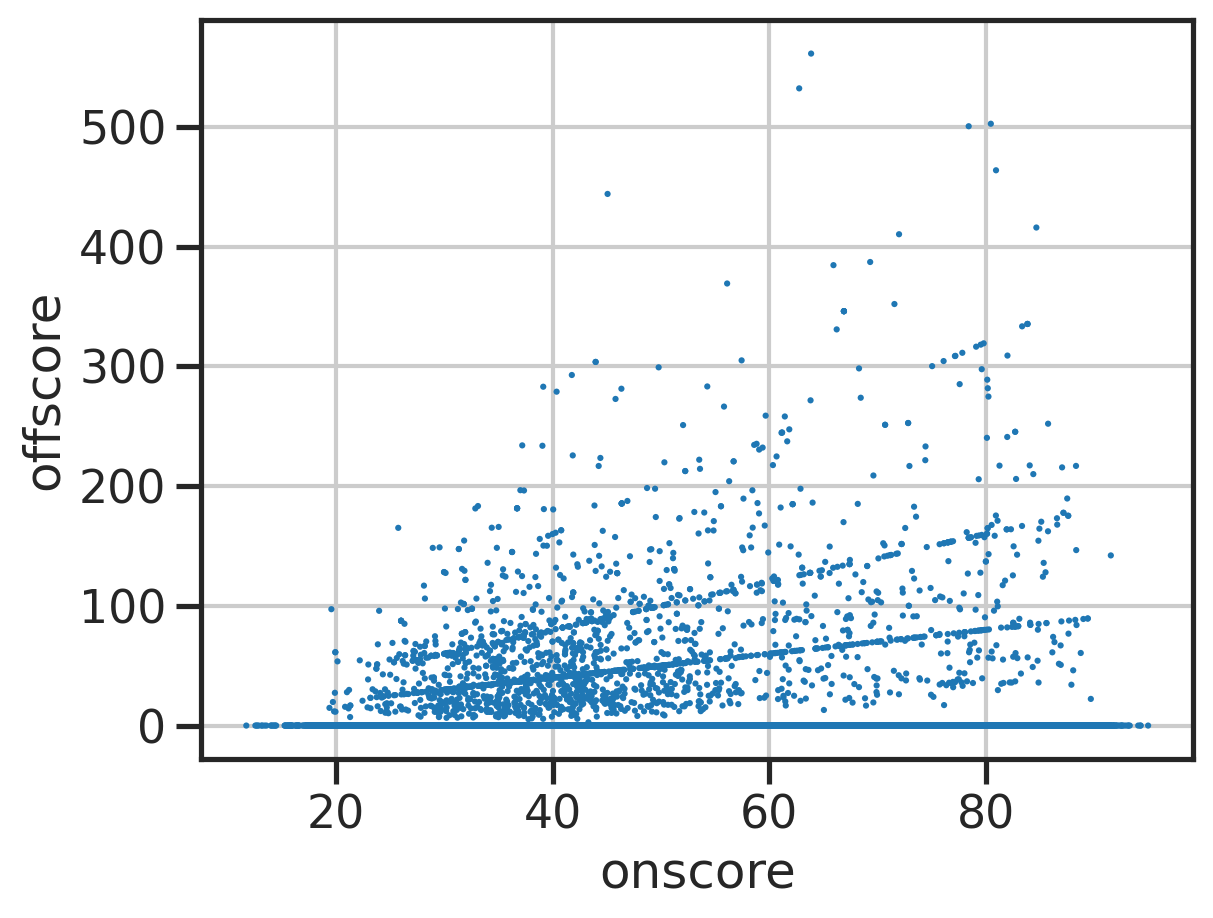

In [12]:
sns.scatterplot(data=df2, x='onscore', y='offscore', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='prob'>

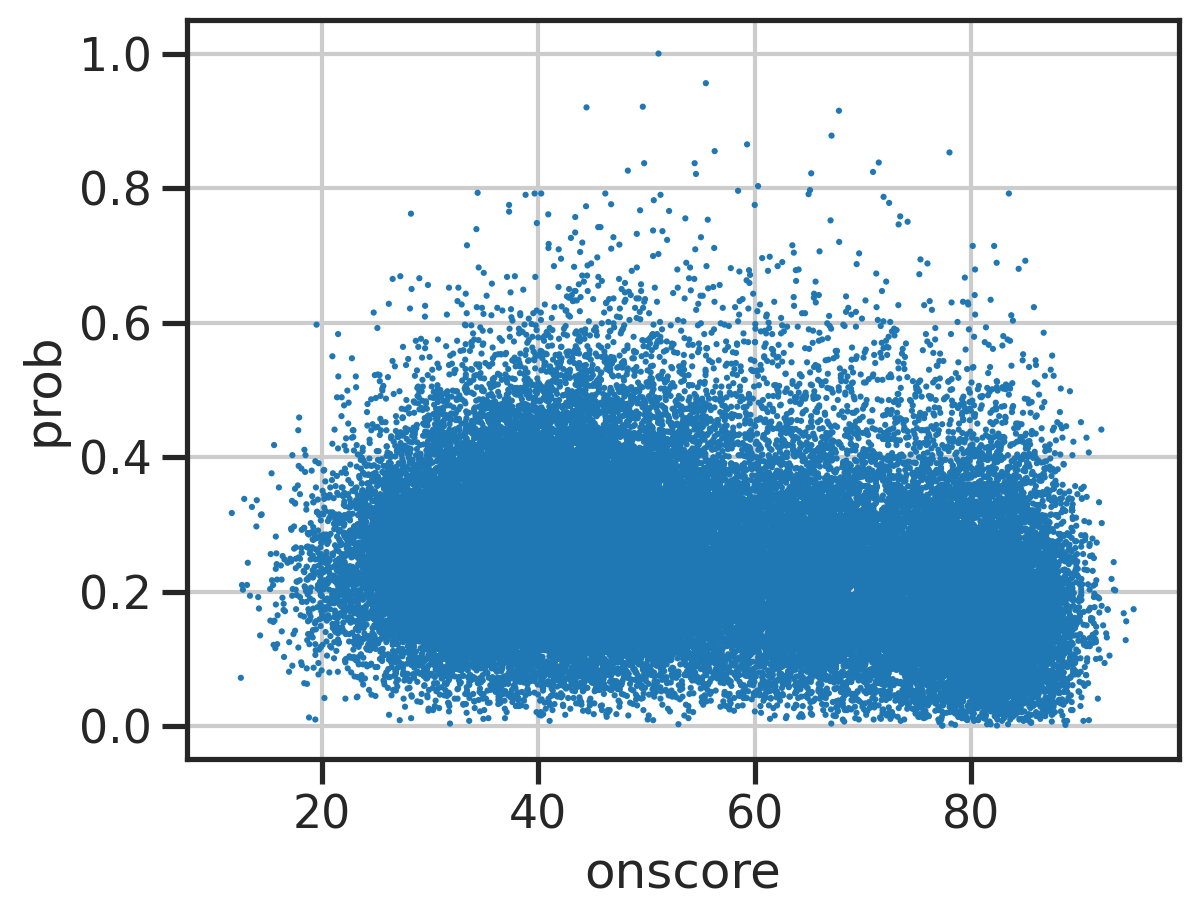

In [13]:
sns.scatterplot(data=df2, x='onscore', y='prob', edgecolor='none', s=5) 

In [14]:
gene_cnstrnts = df2.groupby('gname').size()
gene_cnstrnts_v3 = df3.groupby('gname').size()# .reindex(gene_constraints.index)
gene_cnstrnts_v4 = df4.groupby('gname').size()# .reindex(gene_constraints.index)

# cnstrnts = pd.DataFrame(gene_cnstrnts)
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts

Text(0, 0.5, 'Num. probes')

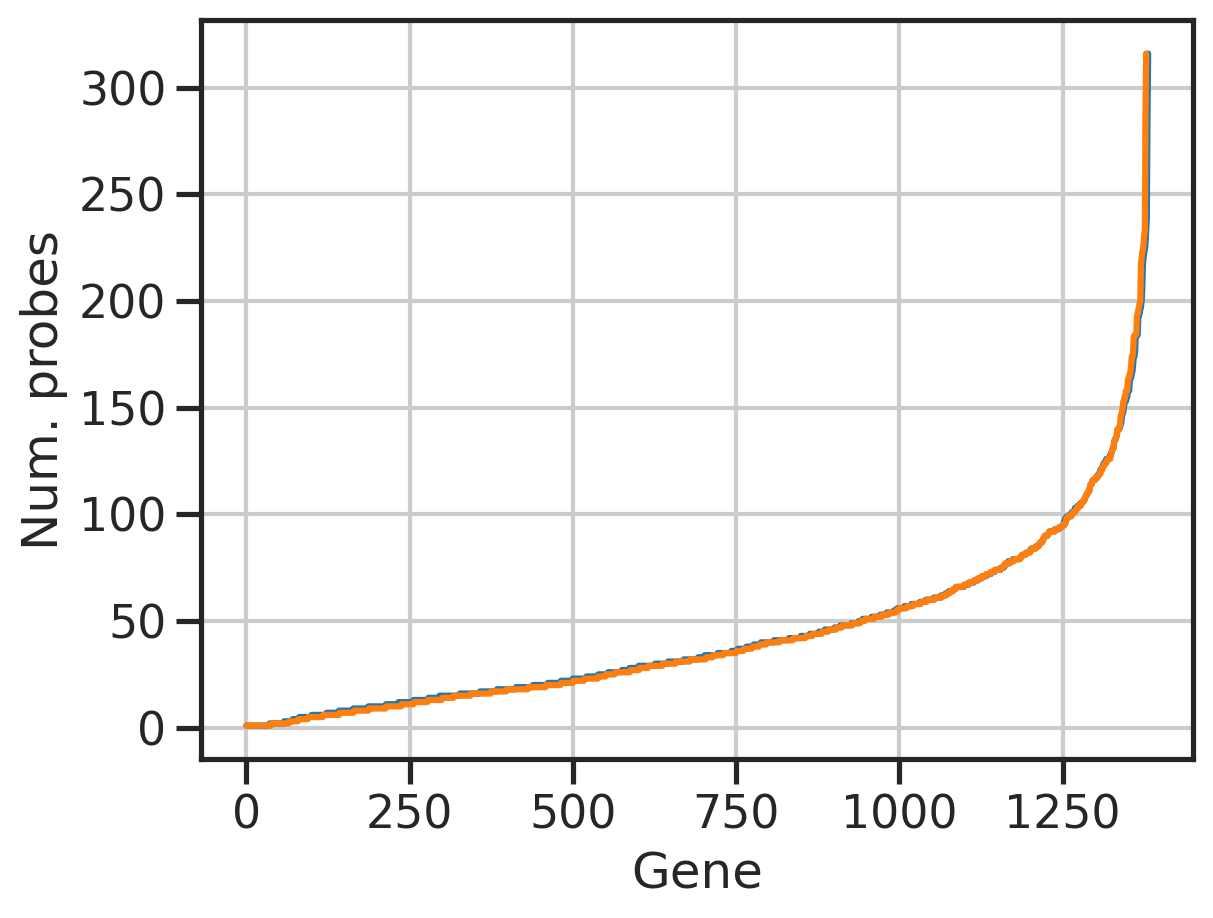

In [15]:
plt.plot(np.sort(gene_cnstrnts))
plt.plot(np.sort(gene_cnstrnts_v3))
plt.plot(np.sort(gene_cnstrnts_v4))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

In [16]:
df2[df2['maxkmer'] > 200]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
6213,chr1,36699878,36699907,TCTGTGTGTGTCTGTGTGTGTGTTGAGCAC,40.92,34.879,42.164,0,0.567,255,+,Actr1b,1,30,0.500000
6214,chr1,36699910,36699939,GGGGAGGGGAGGGGAGGGCTACAGGTGACC,48.71,58.512,0.000,0,0.433,255,+,Actr1b,1,30,0.733333
7913,chr1,39988996,39989025,CTCAGGCACTTCCTCCTCCTCCTCCTCGCT,45.17,67.950,0.000,0,0.296,255,-,Map4k4,4,30,0.633333
8661,chr1,43033646,43033675,GAGTGTCTTTGTGTGTGTGTGTGTGTGGGG,41.38,39.134,283.080,0,0.574,255,-,Gpr45,1,30,0.533333
8707,chr1,43047834,43047863,TTTAAAGGATTTGGTGGTGGTGGTGGTGGG,41.00,31.807,0.000,0,0.379,255,+,Tgfbrap1,2,30,0.500000
23426,chr1,87374037,87374066,TTCCTCCTCCTCCTCCTCGTCCTGTCAATC,41.81,56.774,0.000,0,0.656,255,-,Gigyf2,2,30,0.566667
34658,chr1,131662010,131662039,AGATCCAGGAGCAGCAGCAGCAGCAGCACA,46.81,65.619,26.126,0,0.136,255,-,Ctse,1,30,0.600000
34684,chr1,131675096,131675125,TGGTAGAGGTGGTGTGTGTGTGTGTGTGTT,41.58,37.319,110.735,0,0.765,255,-,Ctse,1,30,0.500000
35515,chr1,132357747,132357776,TGCACCACTTGCTGCTGCTGCTGCTGCAGT,47.91,64.914,0.000,0,0.042,255,+,Tmcc2,3,30,0.600000
35757,chr1,132509768,132509797,AACTAGGCACAAACGTGTGTGTGTGTGTGT,40.96,19.459,0.000,0,0.156,255,+,Cntn2,1,30,0.466667


In [17]:
df2[df2['maxkmer'] == 5]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
1610,chr1,13785711,13785740,TTCAAGAGAGTAGGGAGGGCTTCCTAGGCC,41.94,46.894,85.725,0,0.200,5,+,Gm5523,1,30,0.566667
1613,chr1,13785824,13785853,AACCGAGGGCCTCTCTCTTGCTCTCAATGT,42.57,51.531,0.000,0,0.300,5,+,Gm5523,1,30,0.533333
1616,chr1,13785914,13785943,TCCACCACCCTGTTGCTGTAGCCGTATTCA,42.90,37.355,196.387,0,0.350,5,+,Gm5523,1,30,0.533333
1617,chr1,13785970,13785999,AAAGTTGTCATTGAGAGCAATGCCAGCCCC,41.58,43.974,303.792,0,0.215,5,+,Gm5523,1,30,0.500000
1619,chr1,13786030,13786059,GTTGAAGTCGCAGGAGACAACCTGGTCCTC,42.01,44.256,216.869,0,0.193,5,+,Gm5523,1,30,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63324,chr1,192513655,192513684,GTCCTGGAGTGGAGGGTGGTCCCTCAGGGA,46.65,54.353,163.059,0,0.098,5,+,Hhat,1,30,0.666667
63325,chr1,192513685,192513714,CTGTCCTGGAGTGGAGGGTGGTCCCTCAGG,45.61,59.073,177.220,0,0.121,5,+,Hhat,1,30,0.666667
63326,chr1,192513715,192513744,GACTGTCCTGGAGTGGAGGGTGGTCCCTCA,45.20,54.012,177.978,0,0.107,5,+,Hhat,1,30,0.633333
63327,chr1,192513745,192513774,GGGACTGTCCTGGAGTGGAGGGTGGTCCCT,46.84,57.634,189.596,0,0.164,5,+,Hhat,1,30,0.666667


In [18]:
# 

In [19]:
import Bio.SeqUtils.MeltingTemp as mt

In [20]:
a = df2[df2['onscore']>80]
a

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
38,chr1,3421847,3421876,GCCGCTCTCCCCACTCTGCCGGCTCCGGAT,51.00,88.481,0.0,0,0.269,0,+,Xkr4,1,30,0.733333
41,chr1,3670638,3670667,GCTGGTCCGGGTGGCCCCGTTGCTGTTGCT,50.76,91.293,0.0,0,0.124,0,+,Xkr4,1,30,0.700000
42,chr1,3670668,3670697,GCCGCTGTTGGTGGCGGCGATGTTGCTCTT,48.16,85.159,0.0,0,0.181,0,+,Xkr4,1,30,0.633333
43,chr1,3670698,3670727,GCTGGCGTTGGATGCTTGCCTCTGCGGCGT,49.60,85.424,0.0,0,0.275,0,+,Xkr4,1,30,0.666667
44,chr1,3670728,3670757,GGAAGGACGAACCTCGCCTTCCCCGGCTGC,48.64,83.964,0.0,0,0.151,0,+,Xkr4,1,30,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64220,chr1,194976501,194976530,CCTCTCCTTGCCGGATCCGGCCGCGCCTAC,49.90,81.228,0.0,0,0.151,0,+,Gm16897,1,30,0.733333
64221,chr1,194976589,194976618,CTGAGGGGCCGCAGACCGGGGCGCAAGAAC,50.60,81.986,0.0,0,0.095,0,+,Gm16897,1,30,0.733333
64223,chr1,194976649,194976678,GTAGGCGGCGAGCGTGGTACTGCAACAGGG,47.18,89.796,0.0,0,0.256,0,+,Gm16897,1,30,0.666667
64229,chr1,194976835,194976864,GTGCAGCCAGAGGGGATGCCACCGGGCAGG,50.58,84.555,0.0,0,0.064,0,+,Gm16897,1,30,0.733333


In [21]:
seq = a['seq'].iloc[0]
seq

'GCCGCTCTCCCCACTCTGCCGGCTCCGGAT'

In [22]:
a.iloc[0]

chrom                                    chr1
start                                 3421847
end                                   3421876
seq            GCCGCTCTCCCCACTCTGCCGGCTCCGGAT
tm                                       51.0
onscore                                88.481
offscore                                  0.0
repeat                                      0
prob                                    0.269
maxkmer                                     0
strand                                      +
gname                                    Xkr4
transcripts                                 1
len                                        30
gc                                   0.733333
Name: 38, dtype: object

In [23]:
res = mt.Tm_NN(seq)
res

72.48009603745913

In [24]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=0.02, Na=300, )
res

80.18519719757279

In [25]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=0.02, Na=300, saltcorr=0)
res

86.85068997875607

In [26]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=0.02, Na=50, saltcorr=0)
res

86.85068997875607

In [27]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=2, Na=0, saltcorr=0)
res

86.12943883035626

In [28]:
res = mt.Tm_NN(seq, dnac1=25, dnac2=0.01, Na=300)
res

82.76402779738493

In [29]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=0.02, Na=0, saltcorr=0)
print(res)
res = mt.chem_correction(res, fmd=30)
print(res)

86.85068997875607
67.35068997875607


In [30]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=0.02, Na=300, saltcorr=5)
print(res)
res = mt.chem_correction(res, fmd=30)
print(res)

80.18519719757279
60.68519719757279


In [31]:
res = mt.Tm_NN(seq, dnac1=2, dnac2=2, Na=300, saltcorr=5)
print(res)
res = mt.chem_correction(res, fmd=30)
print(res)

79.49038127117757
59.99038127117757


In [32]:
def recalc_tm(seq, fmd=30, Na=300, dnac1=2, dnac2=2):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    

In [33]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
dfviz['newtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x))
dfviz['newtm2'] = dfviz['seq'].apply(lambda x: recalc_tm(x, dnac2=0.001))
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,newtm,newtm2
0,chr1,3214512,3214541,AAAGCACCATGACCAAGGACACCGAAAACA,41.02,35.893,0.0,0,0.455,2,+,Xkr4,1,30,0.466667,41.020764,50.077835,50.765633
1,chr1,3214544,3214573,AAGCGGGAATGTTTACTTGCTGTGTGGAGG,41.07,49.515,0.0,0,0.346,0,+,Xkr4,1,30,0.500000,41.067468,50.153050,50.835922
2,chr1,3214632,3214661,TTAGCTGATGGAGTGGTAAGCCCTCAAGCA,41.14,22.104,0.0,0,0.301,0,+,Xkr4,1,30,0.500000,41.136012,50.143569,50.839923
3,chr1,3214765,3214794,GGGAAGAGGGTAAGTCTGTACACAGCAGGG,41.25,39.100,0.0,0,0.332,0,+,Xkr4,1,30,0.566667,41.248893,50.294165,50.984006
4,chr1,3214881,3214910,AATTTGGCACTCGAAAGATGTGGCACGTGG,41.75,39.826,0.0,0,0.197,0,+,Xkr4,1,30,0.500000,41.752659,50.882478,51.557718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,51915812,51915841,GCCGCCTGGGGAACGCGGGTCAGATCCGAT,49.83,82.006,0.0,0,0.127,0,+,Myo1b,3,30,0.700000,49.827952,58.858194,59.550791
9996,chr1,51915843,51915872,CGGGGCTTGTGCCACAGTTGCTGCCGGGGA,50.75,87.360,0.0,0,0.164,0,+,Myo1b,3,30,0.700000,50.753105,59.754740,60.452298
9997,chr1,51915878,51915907,CGCCGCTCAGCCGACCGTGCGTTCAGTGCA,50.58,85.100,0.0,0,0.261,0,+,Myo1b,3,30,0.700000,50.583283,59.743304,60.413476
9998,chr1,51915923,51915952,CCGGCTGGGCTCCGAGTGCGCTGGCTAGAG,49.82,85.028,0.0,0,0.217,0,+,Myo1b,3,30,0.733333,49.816133,58.890799,59.575717


In [56]:
dfviz['zhuanglab'] = dfviz['seq'].apply(lambda x: recalc_tm(x, Na=300, fmd=0, dnac1=5, dnac2=5))

Text(0, 0.5, 'our setting TM')

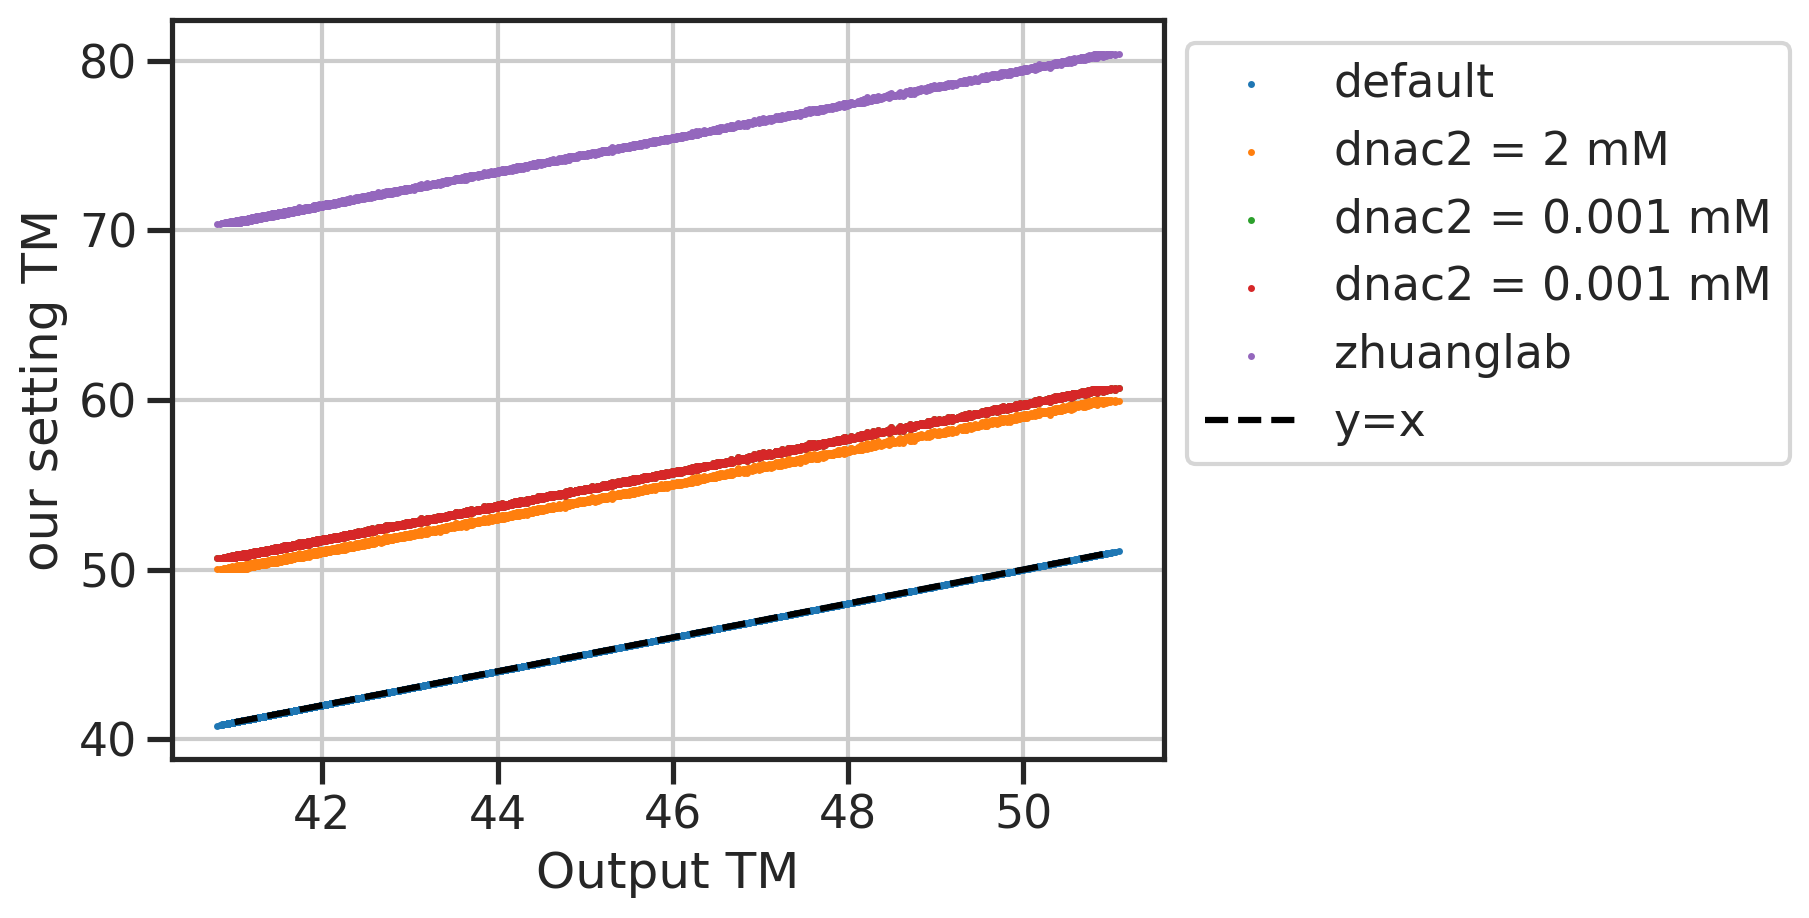

In [57]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="default",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm'].values,
            s=1,
            label="dnac2 = 2 mM",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm2'].values,
            s=1,
            label="dnac2 = 0.001 mM",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm2'].values,
            s=1,
            label="dnac2 = 0.001 mM",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['zhuanglab'].values,
            s=1,
            label="zhuanglab",
            ) 
plt.plot([41, 51], [41,51], '--k', label='y=x')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Output TM")
plt.ylabel("our setting TM")
